# Extract crassphage annotations

In [10]:
import pandas as pd

DRAM_results_folder="/home/davidmartins/Documentos/viral_analysis_v2/DRAMv"
crass_list_folder="/home/davidmartins/Documentos/viral_analysis_v2/genomad"

def renameScaffold(string):
    string = string.split('-')[0]
    return string


df = pd.read_csv(f'{DRAM_results_folder}/IT1/annotations.tsv',sep='\t')
df['scaffold'] = df['scaffold'].apply(renameScaffold)
to_maintain= pd.read_csv(f'{crass_list_folder}/IT1_crass_contigs.txt',names=['contig'])
df = df[df['scaffold'].isin(to_maintain['contig'])]
df = df[['scaffold','kegg_hit','viral_hit','pfam_hits','vogdb_hits']]
df= df.set_index('scaffold')
# Drop rows where all elements are NaN
df1 = df.dropna(how='all')
df1.index = df1.index.str.replace('k127', f'IT1')

df = pd.read_csv(f'{DRAM_results_folder}/IT2/annotations.tsv',sep='\t')
df['scaffold'] = df['scaffold'].apply(renameScaffold)
to_maintain= pd.read_csv(f'{crass_list_folder}/IT2_crass_contigs.txt',names=['contig'])
df = df[df['scaffold'].isin(to_maintain['contig'])]
df = df[['scaffold','kegg_hit','viral_hit','pfam_hits','vogdb_hits']]
df= df.set_index('scaffold')
# Drop rows where all elements are NaN
df2 = df.dropna(how='all')
df2.index = df2.index.str.replace('k127', f'IT2')

df = pd.read_csv(f'{DRAM_results_folder}/IT3/annotations.tsv',sep='\t')
df['scaffold'] = df['scaffold'].apply(renameScaffold)
to_maintain= pd.read_csv(f'{crass_list_folder}/IT3_crass_contigs.txt',names=['contig'])
df = df[df['scaffold'].isin(to_maintain['contig'])]
df = df[['scaffold','kegg_hit','viral_hit','pfam_hits','vogdb_hits']]
df= df.set_index('scaffold')
# Drop rows where all elements are NaN
df3 = df.dropna(how='all')
df3.index = df3.index.str.replace('k127', f'IT3')

df = pd.read_csv(f'{DRAM_results_folder}/IT4/annotations.tsv',sep='\t')
df['scaffold'] = df['scaffold'].apply(renameScaffold)
to_maintain= pd.read_csv(f'{crass_list_folder}/IT4_crass_contigs.txt',names=['contig'])
df = df[df['scaffold'].isin(to_maintain['contig'])]
df = df[['scaffold','kegg_hit','viral_hit','pfam_hits','vogdb_hits']]
df= df.set_index('scaffold')
# Drop rows where all elements are NaN
df4 = df.dropna(how='all')
df4.index = df4.index.str.replace('k127', f'IT4')

final = pd.concat([df1,df2,df3,df4])
final


,kegg_hit,viral_hit,pfam_hits,vogdb_hits
scaffold,,,,
IT1_2161671,NaN,YP_010112708.1 PD-(D/E)XK nuclease-like domain...,NaN,sp|P15032|RECE_ECOLI Exodeoxyribonuclease 8; Xu
IT1_2161671,NaN,YP_008242242.2 DNA polymerase [Cellulophaga ph...,DNA polymerase family B [PF00136.26],REFSEQ DNA polymerase; Xu
IT1_2161671,NaN,NaN,Domain of unknown function (DUF932) [PF06067.16],NaN
IT1_2161671,NaN,YP_010111321.1 VOG0020 [uncultured phage cr111_1],Deoxynucleotide monophosphate kinase [PF21448.3],sp|Q7Y4Y9|DNMK_BPR69 Deoxynucleotide monophosp...
IT1_2161671,NaN,NaN,Spore photoproduct lyase [PF20903.3],NaN
...,...,...,...,...
IT4_4828500,NaN,NaN,NaN,sp|Q60754|MARCO_MOUSE Macrophage receptor MARC...
IT4_541195,NaN,YP_008240654.1 portal protein [Cellulophaga ph...,NaN,sp|A0A385DT68|PORTL_BPCA1 Portal protein; XrXs
IT4_541195,NaN,YP_010110248.1 terminase large subunit [uncult...,NaN,REFSEQ terminase large subunit; Xu


# Extract crassphage annotations by VOGDB classification

In [11]:
import pandas as pd
def renameScaffold(string):
    string = string.split('-')[0]
    return string

# Define a function to process each sample
def process_sample(sample):
    # Read the data for the sample
    df = pd.read_csv(f'{DRAM_results_folder}/{sample}/vMAG_stats.tsv', sep='\t')
    df.rename(columns={'Unnamed: 0': 'contig_id'}, inplace=True)
    df = df[['contig_id', 'Viral replication genes', 'Viral hypothetical genes', 'Viral genes with unknown function',
             'Viral genes with host benefits', 'Viral genes with viral benefits', 'Viral structure genes']]
    df['contig_id'] = df['contig_id'].apply(renameScaffold)
    # Filter to maintain only relevant contigs
    to_maintain = pd.read_csv(f'{crass_list_folder}/{sample}_crass_contigs.txt', names=['contig'])
    df = df[df['contig_id'].isin(to_maintain['contig'])]
    
    # Summarize data for the sample
    df_summary = pd.DataFrame({
        'Sample': [sample],
        'Viral replication genes': [df['Viral replication genes'].sum()],
        'Viral hypothetical genes': [df['Viral hypothetical genes'].sum()],
        'Viral genes with unknown function': [df['Viral genes with unknown function'].sum()],
        'Viral genes with host benefits': [df['Viral genes with host benefits'].sum()],
        'Viral genes with viral benefits': [df['Viral genes with viral benefits'].sum()],
        'Viral structure genes': [df['Viral structure genes'].sum()]
    })
    
    return df_summary

# List of samples
samples = ['IT1', 'IT2', 'IT3', 'IT4']

# Process each sample and store results in a list
summary_dataframes = []
for sample in samples:
    summary_dataframes.append(process_sample(sample))

# Concatenate all summaries into a single DataFrame
final_summary = pd.concat(summary_dataframes, ignore_index=True)
final_summary = final_summary.T
#final_summary.to_csv('crass_gene_summary.tsv', sep='\t')
final_summary

,0,1,2,3
Sample,IT1,IT2,IT3,IT4
Viral replication genes,3.0,1.0,3.0,0.0
Viral hypothetical genes,69.0,103.0,78.0,93.0
Viral genes with unknown function,20.0,34.0,20.0,28.0
Viral genes with host benefits,2.0,5.0,1.0,5.0
Viral genes with viral benefits,0.0,1.0,0.0,0.0
Viral structure genes,2.0,1.0,1.0,1.0


# Plot the venn diagram with crassphage annotations by sample location

The crass_all_genes.tsv table was manually constructed from the final dataframe

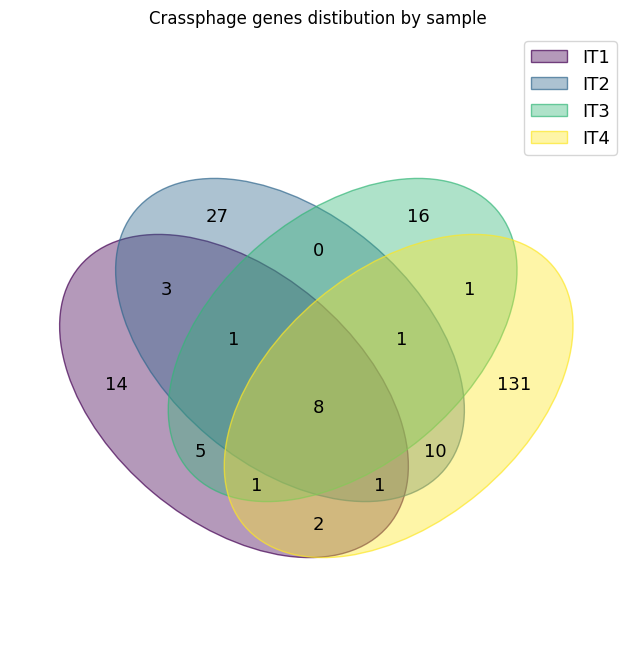

In [17]:
import pandas as pd
from venn import venn
import matplotlib.pyplot as plt

df = pd.read_csv('crass_all_genes.tsv',sep='\t')


# Group by 'sample' and convert 'viral_hit' to sets
grouped = df.groupby('sample')['viral_hit'].apply(set)

# Convert to dictionary format for easy access
sample_sets = grouped.to_dict()

# Plot the Venn diagram for four sets
venn(sample_sets)
plt.title('Crassphage genes distibution by sample')
# Display the diagram
#plt.savefig("crass_venn.png",dpi=300)
plt.show()


# Extract Crassphage Host Taxonomies

In [18]:
import pandas as pd

IPHOP_folder='/home/davidmartins/Documentos/viral_analysis_v2/iphop'

# Function to process each dataset
def process_dataset(it_number):
    df = pd.read_csv(f'{IPHOP_folder}/IT{it_number}/Host_prediction_to_genome_m90.csv')
    df = df[['Virus', 'Host taxonomy']]
    
    crass = pd.read_csv(f'{crass_list_folder}/IT{it_number}_crass_contigs.txt', names=['contig'])
    df = df[df['Virus'].isin(crass['contig'])]
    df['sample'] = f'IT{it_number}'
    
    return df

# List to store results
results = []

# Loop through the datasets
for i in range(1, 5):
    df_processed = process_dataset(i)
    results.append(df_processed)

all_results = pd.concat(results, ignore_index=True)
all_results

,Virus,Host taxonomy,sample
0,k127_299691,d__Archaea;p__Nanoarchaeota;c__Nanoarchaeia;o_...,IT2
1,k127_299691,d__Archaea;p__Nanoarchaeota;c__Nanoarchaeia;o_...,IT2
2,k127_299691,d__Archaea;p__Nanoarchaeota;c__Nanoarchaeia;o_...,IT2
3,k127_299691,d__Archaea;p__Nanoarchaeota;c__Nanoarchaeia;o_...,IT2
4,k127_3227517,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,IT3
5,k127_3227517,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,IT3
6,k127_3227517,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,IT3
7,k127_3227517,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,IT3
8,k127_3227517,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,IT3
9,k127_3227517,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,IT3


# Extract the annotations of crassphages positively correlated to population density

In [19]:
#Get the shared crass annotations among the four samples
def process_dataframe(df):
    df_grouped = df.groupby(['sample', 'viral_hit']).value_counts()
    df_grouped = df_grouped.to_frame()
    df_grouped.reset_index(inplace=True)
    return df_grouped

crass = df
crass = process_dataframe(crass)
counts = crass['viral_hit'].value_counts()
counts = counts.to_frame()
counts.reset_index(inplace=True)
counts = counts[counts['count'] == 4]
counts

,viral_hit,count
0,YP_010108877.1 HAD family hydrolase [Flavobact...,4
1,YP_010111146.1 hypothetical protein KNV36_gp05...,4
2,YP_008240654.1 portal protein [Cellulophaga ph...,4
3,YP_008241505.1 hypothetical protein Phi17:2_gp...,4
4,YP_008242242.2 DNA polymerase [Cellulophaga ph...,4
5,YP_008242272.1 pyrophosphatase [Cellulophaga p...,4
6,YP_010110248.1 terminase large subunit [uncult...,4
7,YP_010108828.1 calcineurin-like phosphoesteras...,4


In [21]:
#Get the shared crass annotations among the poppulation posetively correlated crass-like phages
crass_pos=pd.read_csv("crass_pos_corr.txt")
final =final.reset_index()
crass_pos_annot = final[final['scaffold'].isin(crass_pos['contig_id'])]
crass_pos_annot = crass_pos_annot.drop('kegg_hit',axis=1)
crass_pos_annot['viral_hit'] = crass_pos_annot['viral_hit'].fillna(crass_pos_annot['pfam_hits']).fillna(crass_pos_annot['vogdb_hits'])
crass_pos_annot = crass_pos_annot.drop('pfam_hits',axis=1)
crass_pos_annot = crass_pos_annot.drop('vogdb_hits',axis=1)
crass_pos_annot = crass_pos_annot.drop('scaffold',axis=1)
crass_pos_annot = pd.DataFrame({
    'viral_hit':crass_pos_annot['viral_hit'].unique()
})
crass_pos_annot = crass_pos_annot[crass_pos_annot['viral_hit'].isin(counts['viral_hit'])]
crass_pos_annot

,viral_hit
2,YP_008240654.1 portal protein [Cellulophaga ph...
3,YP_010110248.1 terminase large subunit [uncult...
39,YP_008242242.2 DNA polymerase [Cellulophaga ph...
45,YP_010111146.1 hypothetical protein KNV36_gp05...
